## 제주 여행, 언제 가야 하나요?

이번 강의에서는 기상청에서 제공한 공개데이터를 가지고 제주와 서울의 온도를 시각화 해볼 것 입니다.  
이 결과를 토대로 어떤 계절에 제주여행을 떠나는게 좋은지 의사결정을 할 수 있습니다.

In [1]:
import csv

f = open("001_seoul.csv", 'r', encoding='cp949')

data = csv.reader(f)
data

In [2]:
header = next(data)
header

['\t\t지점번호', '지점명', '일시', '평균기온(℃)', '최고기온(℃)', '최고기온시각', '최저기온(℃)', '최저기온시각']

In [3]:
# csv.reader()함수는 Iterator 타입인 reader 객체를 리턴하므로 
# for 루프를 돌며 한 라인씩 가져올 수 있습니다.

print(data)
print(type(data))
print(dir(data))

<class '_csv.reader'>
['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'dialect', 'line_num']


In [4]:
for row in data:
    print(row)
    
f.close()

['\t\t108', '서울', '2018-01-01', '-1.3', '3.8', '15:38', '-5.1', '07:39']
['\t\t108', '서울', '2018-01-02', '-1.8', '1.8', '13:45', '-4.3', '23:48']
['\t\t108', '서울', '2018-01-03', '-4.7', '-0.4', '15:50', '-7.1', '08:04']
['\t\t108', '서울', '2018-01-04', '-4.7', '-0.7', '15:19', '-8.7', '07:51']
['\t\t108', '서울', '2018-01-05', '-3.0', '1.6', '15:30', '-5.6', '03:06']
['\t\t108', '서울', '2018-01-06', '-2.8', '2.9', '15:39', '-6.8', '06:28']
['\t\t108', '서울', '2018-01-07', '-0.8', '2.8', '15:01', '-5.7', '05:24']
['\t\t108', '서울', '2018-01-08', '1.3', '4.0', '15:07', '-1.2', '23:52']
['\t\t108', '서울', '2018-01-09', '-4.2', '-1.2', '00:01', '-6.1', '08:37']
['\t\t108', '서울', '2018-01-10', '-7.5', '-4.8', '14:12', '-10.3', '23:35']
['\t\t108', '서울', '2018-01-11', '-11.1', '-7.4', '13:58', '-13.6', '23:44']
['\t\t108', '서울', '2018-01-12', '-10.2', '-5.4', '15:43', '-15.3', '08:11']
['\t\t108', '서울', '2018-01-13', '-4.4', '-1.2', '15:40', '-6.6', '02:41']
['\t\t108', '서울', '2018-01-14', '0.6', '

In [5]:
for row in data:
    print(row)

ValueError: I/O operation on closed file.

In [6]:
import csv

f = open("001_seoul.csv", 'r', encoding='cp949')

data = csv.reader(f)
header = next(data)

processedData = []

for row in data:
    if len(row) == 8:
        processedData.append(row)
        
f.close() 

In [7]:
processedData[0]
processedData[-1]
header

['\t\t지점번호', '지점명', '일시', '평균기온(℃)', '최고기온(℃)', '최고기온시각', '최저기온(℃)', '최저기온시각']

In [8]:
#jeju
f_jeju = open('001_jeju.csv', 'r', encoding='cp949')
data = csv.reader(f_jeju)

header = next(data)

processedDataJeju = []

for row in data:
    if len(row) == 8:
        processedDataJeju.append(row)

f_jeju.close()

In [9]:
processedDataJeju[0], processedData[0]
processedDataJeju[-1], processedData[-1]

(['\t\t184', '제주', '2019-10-19', '19.8', '22.7', '14:51', '17.7', '23:27'],
 ['\t\t108', '서울', '2019-10-19', '17.0', '23.1', '15:46', '12.1', '07:10'])

# 시각화

## matplotlib plot 설명
- 가장 기본적인 그래프  
- plt.plot(A, B) -> A가 x축, B가 y축  

In [10]:
import matplotlib.pyplot as plt

plt.plot([1,2,3,4])
plt.show()

<Figure size 640x480 with 1 Axes>

In [11]:
%matplotlib inline

plt.plot([1, 2, 3, 4], [10, 20, 30, 40])
plt.show()

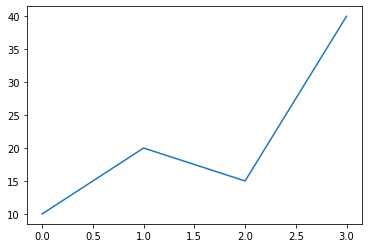

In [12]:
%matplotlib inline

plt.plot([10, 20, 15, 40])
plt.show()

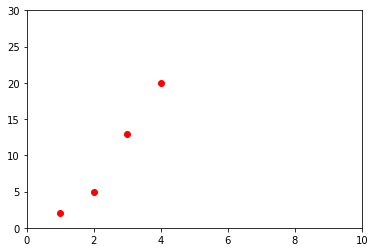

In [13]:
# plot 서식 지정하기
plt.plot([1, 2, 3, 4], [2, 5, 13, 20], 'ro') #ro = red point를 의미합니다. 빨간색 점
plt.axis([0, 10, 0, 30]) # 표 크기를 지정해주는 명령어 입니다.

plt.show()

In [ ]:
t

In [14]:
import numpy as np

t = np.arange(0., 5., 0.2)

plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
# --, s: square, ^ :triangle
plt.legend(['1','2','3']) #레이블 지정하기
plt.show()

### 월별 평균 기온을 가지고 시각화 합니다.

- 서울데이터는 초록색 선, 제주데이터는 파란 선
- y축은 온도, x축은 월
- 현재 데이터에서는 "일"을 기준으로 평균기온을 제공하고 있기 때문에 월 평균기온을 계산한 뒤 그 계산 값을 토대로 그래프를 그려 낼 것 입니다.

In [15]:
processedDataJeju[0], processedData[0]
processedDataJeju[0][3] #평균기온
header

['\t\t지점번호',
 '지점명',
 '일시',
 '평균기온(℃)',
 '최고기온(℃)',
 '\t최고기온시각',
 '최저기온(℃)',
 '최저기온시각']

In [16]:
processedDataSeoul = processedData
# processedDataJeju

In [17]:
processedDataSeoul[1][2]

'2018-01-02'

In [18]:
processedDataSeoul_y = [i[3] for i in processedDataSeoul] #온도
processedDataSeoul_x = [i[2][5:7] for i in processedDataSeoul]

In [19]:
%matplotlib inline

plt.plot(processedDataSeoul_x, processedDataSeoul_y)
plt.show()

In [20]:
processedDataSeoul_x
processedDataSeoul_y

['-1.3',
 '-1.8',
 '-4.7',
 '-4.7',
 '-3.0',
 '-2.8',
 '-0.8',
 '1.3',
 '-4.2',
 '-7.5',
 '-11.1',
 '-10.2',
 '-4.4',
 '0.6',
 '4.7',
 '3.5',
 '4.5',
 '2.1',
 '1.0',
 '2.2',
 '0.4',
 '0.2',
 '-11.7',
 '-14.2',
 '-14.0',
 '-14.8',
 '-9.9',
 '-6.3',
 '-8.5',
 '-5.3',
 '-2.6',
 '-4.0',
 '-2.4',
 '-7.3',
 '-9.5',
 '-9.4',
 '-10.1',
 '-8.0',
 '-4.4',
 '0.4',
 '-0.5',
 '-6.1',
 '-5.8',
 '-0.8',
 '3.5',
 '-0.7',
 '-1.1',
 '-3.0',
 '-0.4',
 '1.8',
 '0.9',
 '-0.9',
 '1.3',
 '4.2',
 '2.4',
 '1.9',
 '3.1',
 '4.2',
 '4.6',
 '-0.2',
 '-0.7',
 '7.9',
 '9.8',
 '5.5',
 '4.5',
 '6.4',
 '4.6',
 '4.5',
 '4.6',
 '6.4',
 '8.0',
 '12.4',
 '17.0',
 '12.4',
 '7.1',
 '6.6',
 '8.2',
 '8.0',
 '4.7',
 '2.1',
 '4.9',
 '6.1',
 '7.6',
 '9.6',
 '11.0',
 '13.3',
 '14.0',
 '15.4',
 '14.8',
 '14.0',
 '15.6',
 '18.4',
 '17.8',
 '13.4',
 '7.6',
 '5.8',
 '4.2',
 '3.9',
 '7.9',
 '15.1',
 '12.6',
 '13.3',
 '14.6',
 '9.0',
 '9.5',
 '11.6',
 '12.9',
 '12.4',
 '14.0',
 '18.4',
 '18.7',
 '15.5',
 '9.3',
 '12.1',
 '14.6',
 '14.9'

In [21]:
seoul_average = []
seoul_month = []
month = 1
count = 1
average = 0

for i, j in zip(processedDataSeoul_x, processedDataSeoul_y):
    if month != int(i):
        print(seoul_average)
        seoul_average.append(average//count)
        seoul_month.append(month)
        month = int(i)
        count = 0
        average = 0
    else:
        average += float(j)
        count += 1

[]
[-4.0]
[-4.0, -2.0]
[-4.0, -2.0, 8.0]
[-4.0, -2.0, 8.0, 12.0]
[-4.0, -2.0, 8.0, 12.0, 18.0]
[-4.0, -2.0, 8.0, 12.0, 18.0, 23.0]
[-4.0, -2.0, 8.0, 12.0, 18.0, 23.0, 27.0]
[-4.0, -2.0, 8.0, 12.0, 18.0, 23.0, 27.0, 28.0]
[-4.0, -2.0, 8.0, 12.0, 18.0, 23.0, 27.0, 28.0, 21.0]
[-4.0, -2.0, 8.0, 12.0, 18.0, 23.0, 27.0, 28.0, 21.0, 12.0]
[-4.0, -2.0, 8.0, 12.0, 18.0, 23.0, 27.0, 28.0, 21.0, 12.0, 7.0]
[-4.0, -2.0, 8.0, 12.0, 18.0, 23.0, 27.0, 28.0, 21.0, 12.0, 7.0, -1.0]
[-4.0, -2.0, 8.0, 12.0, 18.0, 23.0, 27.0, 28.0, 21.0, 12.0, 7.0, -1.0, -1.0]
[-4.0, -2.0, 8.0, 12.0, 18.0, 23.0, 27.0, 28.0, 21.0, 12.0, 7.0, -1.0, -1.0, 1.0]
[-4.0, -2.0, 8.0, 12.0, 18.0, 23.0, 27.0, 28.0, 21.0, 12.0, 7.0, -1.0, -1.0, 1.0, 7.0]
[-4.0, -2.0, 8.0, 12.0, 18.0, 23.0, 27.0, 28.0, 21.0, 12.0, 7.0, -1.0, -1.0, 1.0, 7.0, 12.0]
[-4.0, -2.0, 8.0, 12.0, 18.0, 23.0, 27.0, 28.0, 21.0, 12.0, 7.0, -1.0, -1.0, 1.0, 7.0, 12.0, 19.0]
[-4.0, -2.0, 8.0, 12.0, 18.0, 23.0, 27.0, 28.0, 21.0, 12.0, 7.0, -1.0, -1.0, 1.0, 7.0, 12.0

In [22]:
seoul_month

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9]

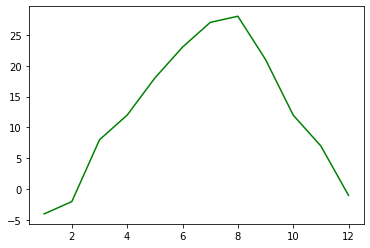

In [23]:
plt.plot(seoul_month[:12], seoul_average[:12], 'green')
plt.show()

In [24]:
processedDataJeju_y = [i[3] for i in processedDataJeju] #온도
processedDataJeju_x = [i[2][5:7] for i in processedDataJeju]

In [33]:
jeju_average = []
jeju_month = []
month = 1
value = []

for i, j in zip(processedDataJeju_x, processedDataJeju_y):
    if month != int(i):
        try:
            jeju_average.append(sum(value)//len(value))
            jeju_month.append(month)
            month = int(i)
            value = []
        except ZeroDivisionError:
            print('Error', month)
    else:
        value.append(float(j))

In [31]:
1 // 0

ZeroDivisionError: integer division or modulo by zero

In [34]:
jeju_average, jeju_month

([4.0,
  5.0,
  11.0,
  15.0,
  19.0,
  22.0,
  27.0,
  28.0,
  23.0,
  17.0,
  13.0,
  8.0,
  6.0,
  7.0,
  10.0,
  14.0,
  20.0,
  21.0,
  25.0,
  27.0,
  23.0],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9])

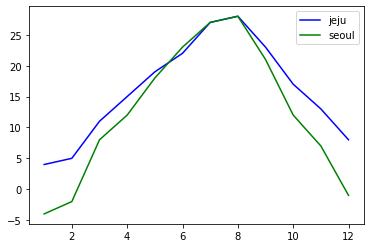

In [35]:
plt.plot(jeju_month[:12], jeju_average[:12], 'blue', label='jeju')
plt.plot(seoul_month[:12], seoul_average[:12], 'green', label='seoul')
plt.legend()
plt.show()

## 의사결정 : 겨울과 봄에 오면 좋습니다.

(겨울과 봄에 서울보다 따뜻하기 때문에)